**Import Library & Dataset**

In [ ]:
import pandas as pd
import io
from google.colab import files


In [ ]:
uploaded = files.upload()


Saving Telco_customer_churn.csv to Telco_customer_churn (4).csv


In [ ]:
print(uploaded.keys())


dict_keys(['Telco_customer_churn (4).csv'])


In [ ]:
filename = list(uploaded.keys())[0]  # ambil nama file otomatis
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Tampilkan 5 baris pertama
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


**1. Persentase Customer Churn vs Tidak Churn**

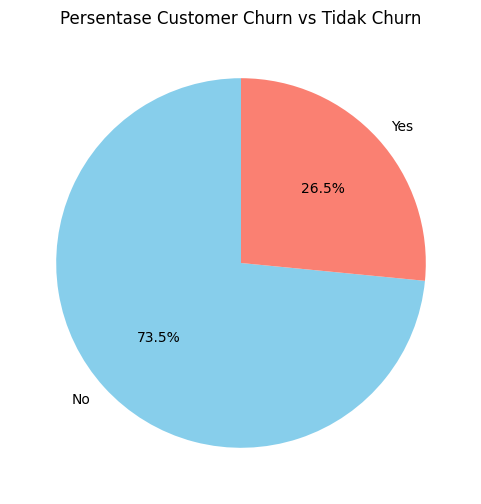

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah churn dan tidak churn
churn_counts = df['Churn Label'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Persentase Customer Churn vs Tidak Churn')
plt.ylabel('')
plt.show()

**Penjelasan**:
Dari pie chart terlihat bahwa sebagian besar customer tidak churn, tapi ada juga yang churn dalam jumlah cukup besar.

**2. Hubungan Tenure dengan Total Charges**

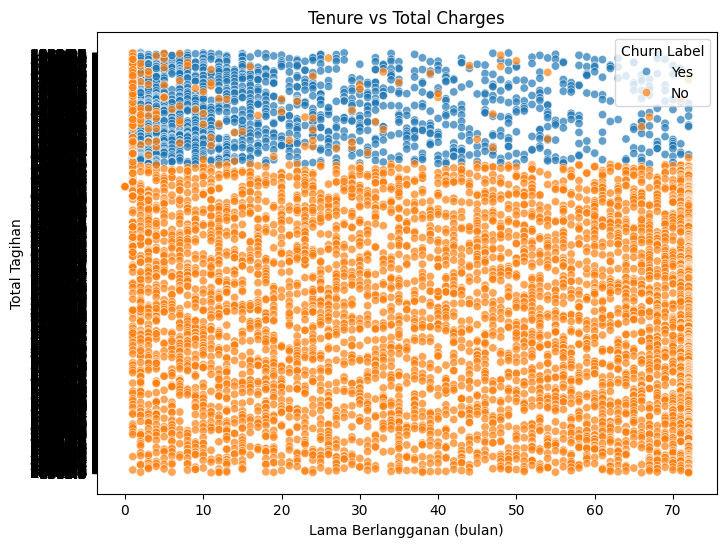

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure Months', y='Total Charges', hue='Churn Label', data=df, alpha=0.7)
plt.title('Tenure vs Total Charges')
plt.xlabel('Lama Berlangganan (bulan)')
plt.ylabel('Total Tagihan')
plt.show()

**Penjelasan**:
Customer yang baru berlangganan (tenure rendah) lebih banyak churn. Semakin lama berlangganan, tagihan makin besar, dan kemungkinan churn makin kecil.

3. **5 Kota dengan Churn Tertinggi**

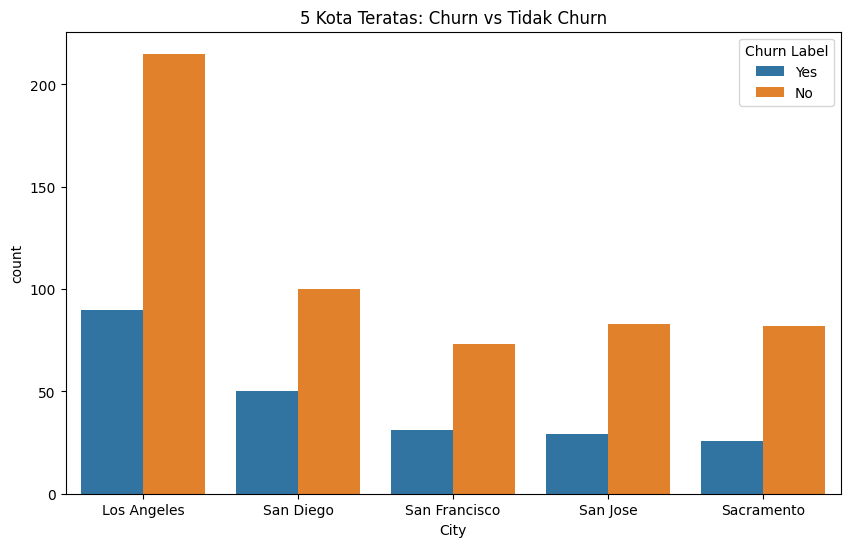

In [ ]:
# Ambil 5 kota dengan jumlah customer terbanyak
top_cities = df['City'].value_counts().head(5).index
df_top = df[df['City'].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.countplot(x='City', hue='Churn Label', data=df_top)
plt.title('5 Kota Teratas: Churn vs Tidak Churn')
plt.show()

**Penjelasan**: Ada beberapa kota yang punya angka churn lebih tinggi. Data ini bisa dipakai perusahaan untuk fokus meningkatkan pelayanan di kota tersebut.

**4. Distribusi Tenure per Label Churn**

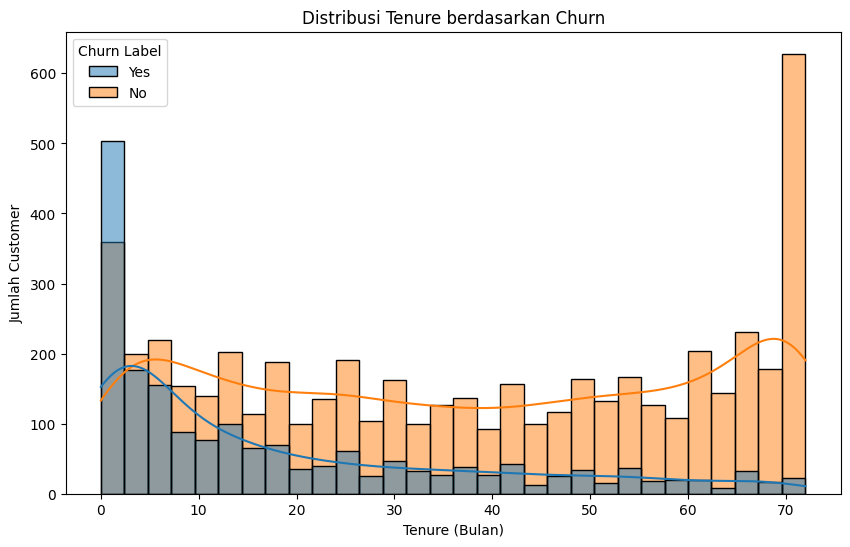

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', bins=30, kde=True)
plt.title('Distribusi Tenure berdasarkan Churn')
plt.xlabel('Tenure (Bulan)')
plt.ylabel('Jumlah Customer')
plt.show()

**Penjelasan**:
 Customer yang churn kebanyakan punya tenure pendek. Sementara customer dengan tenure panjang lebih loyal.

**Kesimpulan**

Mayoritas customer tidak churn, tapi churn masih signifikan.
Tenure pendek menjadi ciri utama customer yang churn.
Ada beberapa kota dengan tingkat churn tinggi → ini bisa jadi target strategi retensi.
Visualisasi membantu memahami pola perilaku customer dan memberi arahan untuk pengambilan keputusan.